<a href="https://colab.research.google.com/github/aslbekrazzoqberdi/Colab_data/blob/main/16_Time_Series_DataIndex%2C_Resempling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone  'https://github.com/codebasics/py.git'
! pip install geopandas

import pandas as pd


Cloning into 'py'...
remote: Enumerating objects: 2910, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2910 (delta 0), reused 2 (delta 0), pack-reused 2904
Receiving objects: 100% (2910/2910), 196.66 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (1121/1121), done.
Updating files: 100% (1388/1388), done.


In [ ]:
df = pd.read_csv("/content/py/pandas/16_ts_holidays/aapl.csv", parse_dates=["Date"], index_col="Date" )

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061


In [ ]:
df.index

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
df["2017-07"]

<ipython-input-15-f988245f4306>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2017-07"]


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636
2017-07-11,144.73,145.85,144.38,145.53,19781836
2017-07-12,145.87,146.18,144.82,145.74,24884478
2017-07-13,145.50,148.49,145.44,147.77,25199373
2017-07-14,147.97,149.33,147.33,149.04,20132061


In [ ]:
df.shape

(14, 5)

In [ ]:
df2 = df.loc["2017-07-20"]
df2

Open           151.50
High           151.74
Low            150.19
Close          150.34
Volume    17243748.00
Name: 2017-07-20 00:00:00, dtype: float64

In [ ]:
df.Close

Date
2017-07-03    143.50
2017-07-05    144.09
2017-07-06    142.73
2017-07-07    144.18
2017-07-10    145.06
2017-07-11    145.53
2017-07-12    145.74
2017-07-13    147.77
2017-07-14    149.04
2017-07-17    149.56
2017-07-18    150.08
2017-07-19    151.02
2017-07-20    150.34
2017-07-21    150.27
Name: Close, dtype: float64

In [ ]:
df3 = pd.read_csv("/content/py/pandas/16_ts_holidays/aapl_no_dates.csv")
df3

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636
5,144.73,145.85,144.38,145.53,19781836
6,145.87,146.18,144.82,145.74,24884478
7,145.50,148.49,145.44,147.77,25199373
8,147.97,149.33,147.33,149.04,20132061
9,148.82,150.90,148.57,149.56,23793456


In [ ]:
df.shape

(14, 5)

In [ ]:
df5 = df.Close.resample('D').mean().fillna(150)
df5

Date
2017-07-03    143.50
2017-07-04    150.00
2017-07-05    144.09
2017-07-06    142.73
2017-07-07    144.18
2017-07-08    150.00
2017-07-09    150.00
2017-07-10    145.06
2017-07-11    145.53
2017-07-12    145.74
2017-07-13    147.77
2017-07-14    149.04
2017-07-15    150.00
2017-07-16    150.00
2017-07-17    149.56
2017-07-18    150.08
2017-07-19    151.02
2017-07-20    150.34
2017-07-21    150.27
Freq: D, Name: Close, dtype: float64

<Axes: xlabel='Date'>

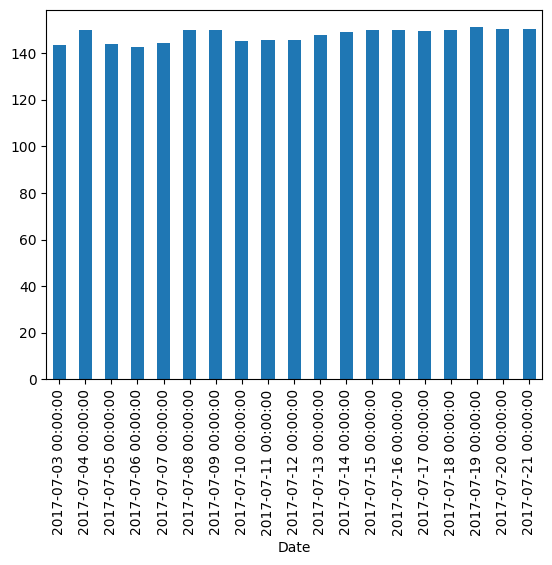

In [ ]:
%matplotlib inline
df5.plot(kind = "bar")